# Get Tweets from Elon Musk and analyse for Sentiment

### Import Token

In [2]:
import os
from dotenv import load_dotenv
load_dotenv()

API_KEY = os.getenv('API_KEY')
API_SECRET = os.getenv('API_SECRET')
BEARER_TOKEN = os.getenv('BEARER_TOKEN')
ACCESS_TOKEN = os.getenv('ACCESS_TOKEN')
ACCESS_SECRET = os.getenv('ACCESS_SECRET')

print(BEARER_TOKEN)

AAAAAAAAAAAAAAAAAAAAANMFagEAAAAALuSxvjXHqjNA8XtI2dBgSvK21oo%3D3lnEbIyChdpRg4xsOdkvIGgtEuzrRDdV7GlKa0jHAZZKqHxMLz


### Import libraries

In [3]:
import tweepy
from wordcloud import WordCloud
from textblob import TextBlob
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

ModuleNotFoundError: No module named 'nltk'

## Authenticate the Twitter API 

In [ ]:

auth = tweepy.OAuth1UserHandler(
    API_KEY, API_SECRET, ACCESS_TOKEN, ACCESS_SECRET
)
# Creating the API object
api = tweepy.API(auth, wait_on_rate_limit=True)

# public_tweets = api.home_timeline()
# for tweet in public_tweets:
#     print(tweet.text)


### Get 10 Tweets from Elon Musk as a Test

In [ ]:
# Get the tweets and store as variable
posts = api.user_timeline(screen_name="elonmusk", count=100,tweet_mode = "extended")

# Print 5 tweets
print("Show 5 tweets from Elon Musk")

i=1
for tweet in posts[0:10]:
    print(str(i) + ') '+tweet.full_text + '\n')
    i+=1

Show 5 tweets from Elon Musk
1) RT @SpaceX: NASA has ordered six additional @space_station resupply missions from SpaceX! Dragon will continue to deliver critical cargo an…

2) @NeckarValue @jimmyasoni True

3) @Kristennetten @Rainmaker1973 🤣

4) The consequences of this poll will be important. Please vote carefully.

5) @Rainmaker1973 I would gladly follow the directions of the chemtrails masterminds, but I can’t figure out what they’re saying!

6) Free speech is essential to a functioning democracy.

Do you believe Twitter rigorously adheres to this principle?

7) @stats_feed Easily

8) @BrandonCrowl 💯

9) https://t.co/9MC6DHlNzb

10) @MemesOfMars 🤣

11) Old, but good https://t.co/SmA9MueqBa

12) @harsimranbansal 👀

13) Most people think the fruit was named after the color (fools!) https://t.co/snrsV9nXYb

14) The movie Gaslight has gaslit so many people it’s insane

15) ♥️♥️ NASA ♥️♥️ https://t.co/Y9vsbLpOqh

16) @muratpak You mean email?

17) @EvaFoxU 🤣

18) @pmarca 🤣

19) Twitter 

In [ ]:
# Create Dataframe with Tweets as Column
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
print(len(df))
# Show first 5 rows of data
df.head()


100


,Tweets
0,RT @SpaceX: NASA has ordered six additional @s...
1,@NeckarValue @jimmyasoni True
2,@Kristennetten @Rainmaker1973 🤣
3,The consequences of this poll will be importan...
4,@Rainmaker1973 I would gladly follow the direc...


In [ ]:
# Cleaning the text
# r tells python that it is a raw stream (regex)
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+','',text) #removes @mentions
    text = re.sub(r'#','',text) #removes # 
    text = re.sub(r'RT[\s]+','',text) #removes retweets
    text = re.sub(r'https?:\/\/\S+','',text) #removes hyperlink, the '?' matches 0 or 1 reps of the preceding 's'
    return text

# Calling the function
df['Tweets'] = df['Tweets'].apply(cleanTxt)
print(len(df))
# Show the cleaned text
df

100


,Tweets
0,: NASA has ordered six additional _station res...
1,True
2,🤣
3,The consequences of this poll will be importan...
4,I would gladly follow the directions of the c...
...,...
95,"If this version performs well, we can probabl..."
96,_01001101 Vector lanes is a particularly sign...
97,What are your thoughts about probable inflatio...
98,Always worth reading about the many civilizat...


# Get Sentiment

In [ ]:

# Function to get subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Function to get polarity (how positiv or negative)
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Create two more columns in Dataframe
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show new Dataframe
df

,Tweets,Subjectivity,Polarity
0,: NASA has ordered six additional _station res...,0.800,0.000
1,True,0.650,0.350
2,🤣,0.000,0.000
3,The consequences of this poll will be importan...,1.000,0.150
4,I would gladly follow the directions of the c...,1.000,0.625
...,...,...,...
95,"If this version performs well, we can probabl...",0.000,0.000
96,_01001101 Vector lanes is a particularly sign...,0.875,0.375
97,What are your thoughts about probable inflatio...,0.050,-0.100
98,Always worth reading about the many civilizat...,0.300,0.400


# Wordcloud

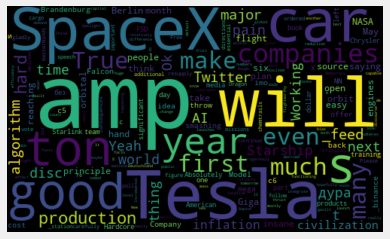

In [ ]:
all_words = ' '.join([tweets for tweets in df['Tweets']])
word_cloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(all_words)

plt.imshow(word_cloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
# sort sentiment into analysis

def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['Analysis of Polarity'] = df['Polarity'].apply(getAnalysis)
print(len(df))
df

100


,Tweets,Subjectivity,Polarity,Analysis of Polarity
0,: NASA has ordered six additional _station res...,0.800,0.000,Neutral
1,True,0.650,0.350,Positive
2,🤣,0.000,0.000,Neutral
3,The consequences of this poll will be importan...,1.000,0.150,Positive
4,I would gladly follow the directions of the c...,1.000,0.625,Positive
...,...,...,...,...
95,"If this version performs well, we can probabl...",0.000,0.000,Neutral
96,_01001101 Vector lanes is a particularly sign...,0.875,0.375,Positive
97,What are your thoughts about probable inflatio...,0.050,-0.100,Negative
98,Always worth reading about the many civilizat...,0.300,0.400,Positive


In [ ]:
# Print only positive tweets
sorted_DF = df.sort_values(by=['Polarity'])

for i in range(0,sorted_DF.shape[0]):
    if(sorted_DF['Analysis of Polarity'][i] == 'Positive'):
        print(str(i)+') ' +sorted_DF['Tweets'][i])
        print()

1)   True

3) The consequences of this poll will be important. Please vote carefully.

4)  I would gladly follow the directions of the chemtrails masterminds, but I can’t figure out what they’re saying!

5) Free speech is essential to a functioning democracy.

Do you believe Twitter rigorously adheres to this principle?

6) _feed Easily

10) Old, but good 

12) Most people think the fruit was named after the color (fools!) 

20)  I’m worried about de facto bias in “the Twitter algorithm” having a major effect on public discourse. 

How do we know what’s really happening?

21)  True. And even a 10% reduction in g would make reaching orbit relatively easy.

23)    New

26)   First Starship orbital flight will be with Raptor 2 engines, as they are much more capable &amp; reliable. 230 ton or ~500k lb thrust at sea level.

We’ll have 39 flightworthy engines built by next month, then another month to integrate, so hopefully May for orbital flight test.

27)   SpaceX default plan was ~65% of

In [ ]:
print(df.shape)

(100, 4)


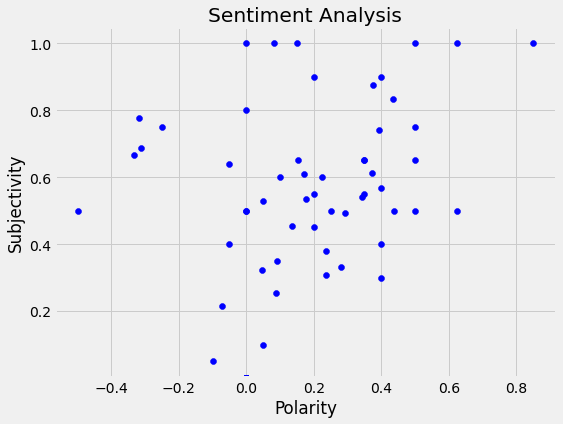

In [ ]:
# Plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
    plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Blue')
    
plt.title("Sentiment Analysis")
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
# Get the percentage of positive & negative tweets
pos_tweets = df[df["Analysis of Polarity"] == "Positive"]
neg_tweets = df[df["Analysis of Polarity"] == "Negative"]
neutral_tweets = df[df["Analysis of Polarity"] == "Neutral"]

pos_tweets = pos_tweets['Tweets']
neg_tweets = neg_tweets['Tweets']
neutral_tweets = neutral_tweets['Tweets']

print(str(round((pos_tweets.shape[0] / df.shape[0]) * 100,1))+"% positive Tweets")
print(str(round((neg_tweets.shape[0] / df.shape[0]) * 100,1))+"% negative Tweets")
print(str(round((neutral_tweets.shape[0] / df.shape[0]) * 100,1))+"% neutral Tweets")

41.0% positive Tweets
9.0% negative Tweets
50.0% neutral Tweets


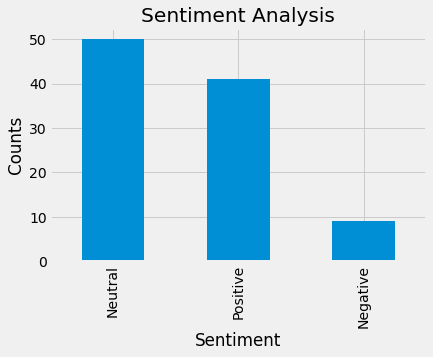

In [ ]:
# Show percentage as diagram

df['Analysis of Polarity'].value_counts()

plt.title("Sentiment Analysis")
plt.xlabel("Sentiment")
plt.ylabel("Counts")
df["Analysis of Polarity"].value_counts().plot(kind="bar")
plt.show()